In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


## Metrics 
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler

## For ML Models:
from sklearn.linear_model import LogisticRegression,LinearRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import random


In [66]:
df = pd.read_csv('cleaned.csv')

In [67]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [68]:
y_test

21781    0
16129    1
12830    0
20940    1
18392    1
        ..
27097    0
6161     1
28543    0
3388     0
3310     1
Name: loan_status, Length: 8592, dtype: int64

In [69]:
print(f'X Test Shape: {X_test.shape}')
print(f'y Test Shape: {y_test.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'y Train Shape: {y_train.shape}')


X Test Shape: (8592, 11)
y Test Shape: (8592,)
X Train Shape: (20046, 11)
y Train Shape: (20046,)


## Creating the Pipeline will require:
* Preprocessing numerical features:
    1. StandardScaler - To balance scale among features 
*
* Applying SMOTE to handle imbalance in our Target variable

## Function for Model Results

In [70]:
def results(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    disp.plot()

In [71]:
numericals = list(X.select_dtypes(['float64','int64']).columns)
numericals

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [72]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numericals),],remainder= 'passthrough')

# LinearRegression

In [73]:
lr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LinearRegression())])

In [74]:
lr.fit(X_train,y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.084


### Linear Regression performs poorly with a model score of only 0.079, which suggests that linear regression is not suitable for this classification task. Linear regression is more suitable for regression tasks where the target variable is continuous.

# LogisticRegression 

In [75]:
logreg = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LogisticRegression())])

In [76]:
logreg.fit(X_train,y_train)
print("model score: %.3f" % logreg.score(X_test, y_test))

model score: 0.779


Accuracy Score: 0.7834979547041804
Precision Score: 0.4989614243323442
Recall Score: 0.7773925104022191
F1 Score: 0.6078076992589915


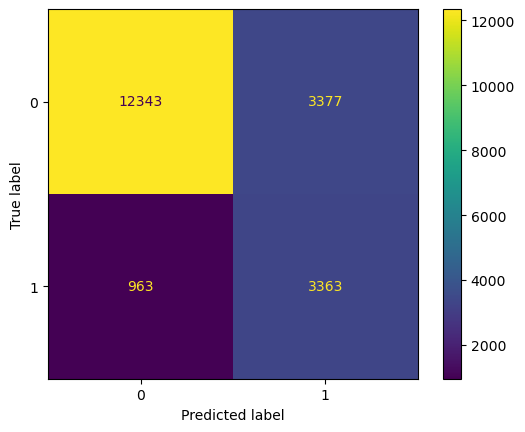

In [77]:
results(logreg,X_train, y_train)

Accuracy Score: 0.7789804469273743
Precision Score: 0.4961699164345404
Recall Score: 0.7591901971230687
F1 Score: 0.6001263423878711


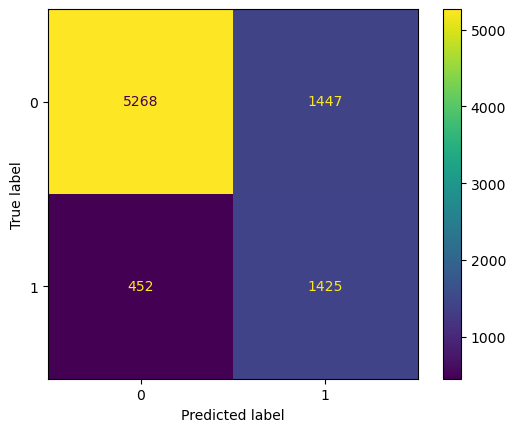

In [78]:
results(logreg,X_test, y_test)

Accuracy Score: 0.7789804469273743
Precision Score: 0.4961699164345404
Recall Score: 0.7591901971230687
F1 Score: 0.6001263423878711


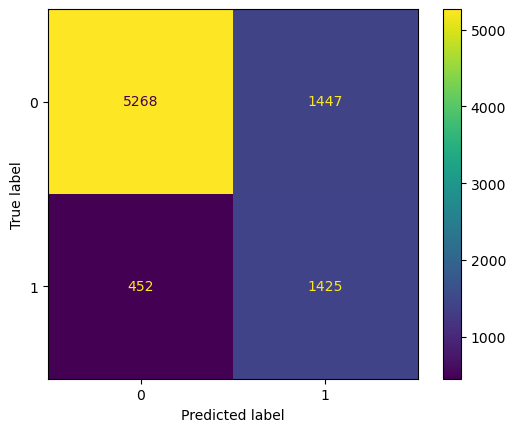

In [79]:
results(logreg,X_test, y_test)

In [80]:
logreg_params = {'classifier__max_iter':[100,1000, 10000],
                 'classifier__solver':['liblinear', 'lbfgs','newton-cg']}

In [81]:
logreg_grid = GridSearchCV(logreg, logreg_params)
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [100, 1000, 10000],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg']})

In [82]:
logreg_grid.best_params_

{'classifier__max_iter': 1000, 'classifier__solver': 'newton-cg'}

In [83]:
logreg_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_home_ownership',
                                                   'person_emp_length',
                                                   'loan_intent', 'loan_grade',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_default_on_file',
                                                   'cb_person_cred_hist_length'])])),
                ('SMOTE', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='newton-cg'))])

In [84]:
best_logreg = logreg_grid.best_estimator_

Accuracy Score: 0.7850942831487578
Precision Score: 0.5013416815742398
Recall Score: 0.7773925104022191
F1 Score: 0.6095704187058185


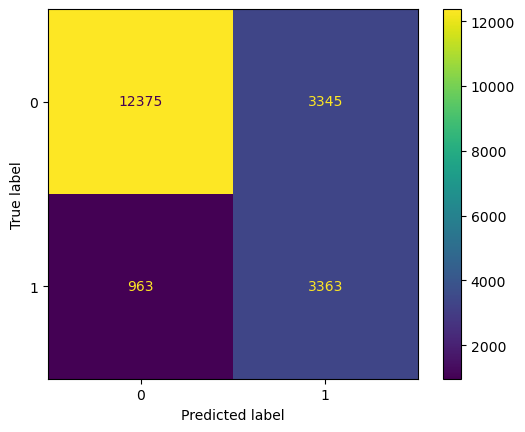

In [85]:
results(best_logreg,X_train,y_train)

Accuracy Score: 0.7811918063314711
Precision Score: 0.49947386881795863
Recall Score: 0.7586574320724561
F1 Score: 0.6023688663282571


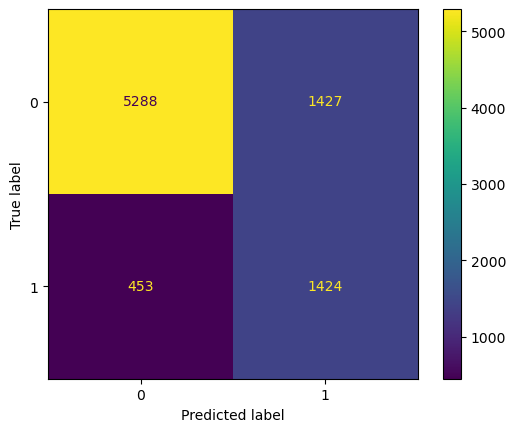

In [86]:
results(best_logreg, X_test, y_test)

These evaluation metrics suggest that the logistic regression model performs reasonably well in predicting loan status, but precision indicates that theres still room for improvement

# RidgeClassifier

In [87]:
rr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RidgeClassifier())])

In [88]:
rr.fit(X_train,y_train)
print("model score: %.3f" % rr.score(X_test, y_test))

model score: 0.784


Accuracy Score: 0.7898832684824902
Precision Score: 0.5087102689486552
Recall Score: 0.7695330559408229
F1 Score: 0.6125114995400183


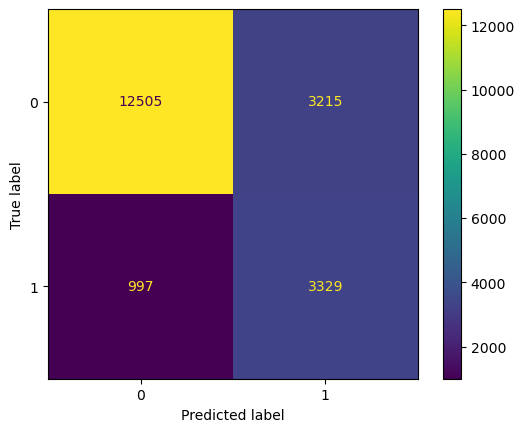

In [89]:
results(rr,X_train,y_train)

Accuracy Score: 0.7844506517690876
Precision Score: 0.5044690740078656
Recall Score: 0.7517314864144912
F1 Score: 0.6037655113393239


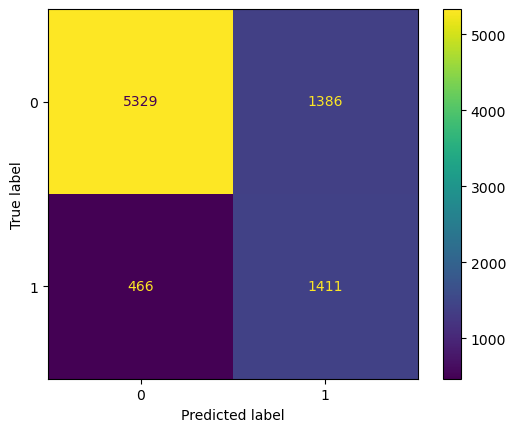

In [90]:
results(rr,X_test,y_test)

In [91]:
rr_params = {
    'classifier__alpha': [0.1, 1.0, 10.0],
    'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'classifier__max_iter': [1000, 5000, 10000]
}

In [92]:
rr_grid = GridSearchCV(rr, rr_params)
rr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', RidgeClassifier())]),
             param_grid={'classifier__alpha': [0.1, 1.0, 10.0],
                         'classifier__max_iter': [1000, 5000, 10000],
                         'classifier__solver': ['auto', 'svd', 'cholesky',
                                                'lsqr', 'sparse_cg']})

In [93]:
best_rr = rr_grid.best_estimator_

Accuracy Score: 0.788586251621271
Precision Score: 0.5066950699939136
Recall Score: 0.7697642163661581
F1 Score: 0.6111213066617728


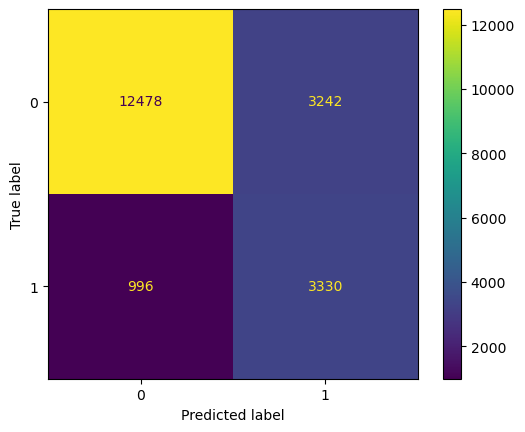

In [94]:
results(best_rr,X_train,y_train)

Accuracy Score: 0.7847998137802608
Precision Score: 0.505
Recall Score: 0.7533297815663292
F1 Score: 0.6046611075475732


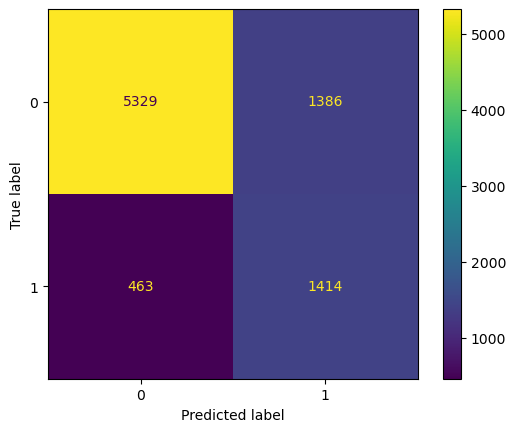

In [95]:
results(best_rr, X_test, y_test)

### Ridge Classifier outperforms Logistic Regression in terms of accuracy and F1 score on both the training and test sets. However, the differences in performance between the two models are relatively small.

# Random Forest 

In [96]:
rf = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RandomForestClassifier())])

In [97]:
rf.fit(X_train,y_train)
print("RandomForest Classifier score: %.3f" % rf.score(X_test, y_test))

RandomForest Classifier score: 0.928


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


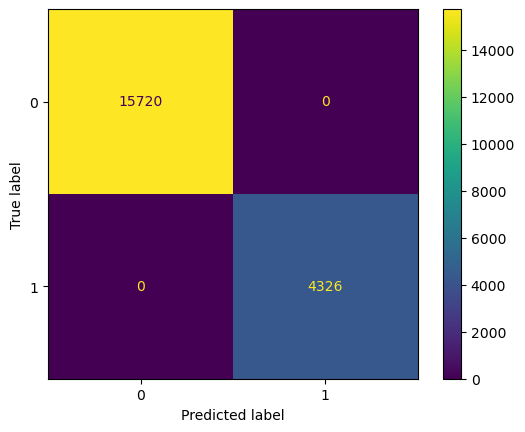

In [98]:
results(rf,X_train,y_train)

Accuracy Score: 0.9276070763500931
Precision Score: 0.9330572808833678
Recall Score: 0.7202983484283431
F1 Score: 0.8129885748647022


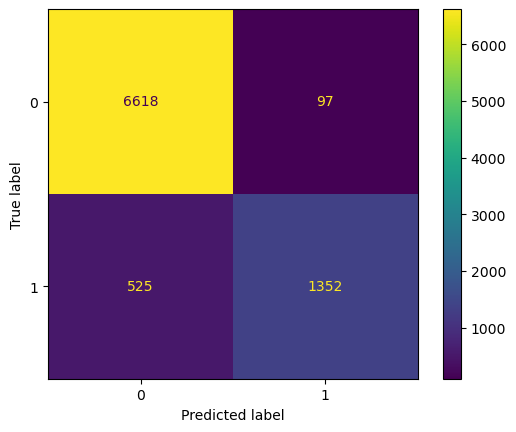

In [99]:
results(rf,X_test,y_test)

In [100]:
rf_params =  {'classifier__criterion': ['gini', 'entropy'], 
               'classifier__max_depth':[15,20],
               'classifier__n_estimators':[50,100],
               'classifier__max_depth':[10,20,30],
               'classifier__min_samples_split': [10,15,20],
               'classifier__min_samples_leaf':[5,10]
             
             }

In [101]:
rf_grid = GridSearchCV(rf,rf_params,cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [5, 10],
                         'classifier__min_samples_split': [10, 15, 20],
                         'classifier__n_estimators': [50, 100]})

In [102]:
best_rf_grid = rf_grid.best_estimator_
best_rf_grid.fit(X_train,y_train)
print("RandomForest Classifier Grid score: %.3f" % best_rf_grid.score(X_test, y_test))

RandomForest Classifier Grid score: 0.923


Accuracy Score: 0.9626359373441086
Precision Score: 0.9874625238484601
Recall Score: 0.8374942209893667
F1 Score: 0.9063164477798625


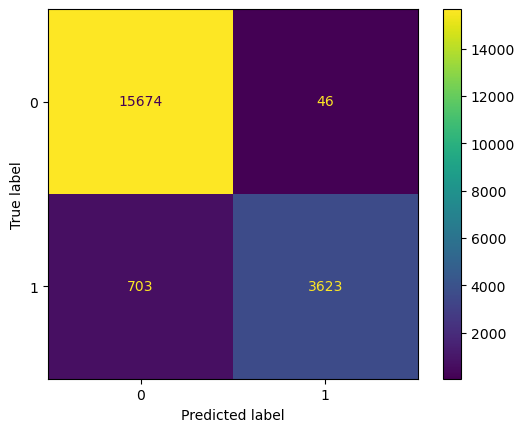

In [103]:
results(best_rf_grid,X_train,y_train)

Accuracy Score: 0.9228351955307262
Precision Score: 0.9134877384196185
Recall Score: 0.7144379328716036
F1 Score: 0.8017937219730943


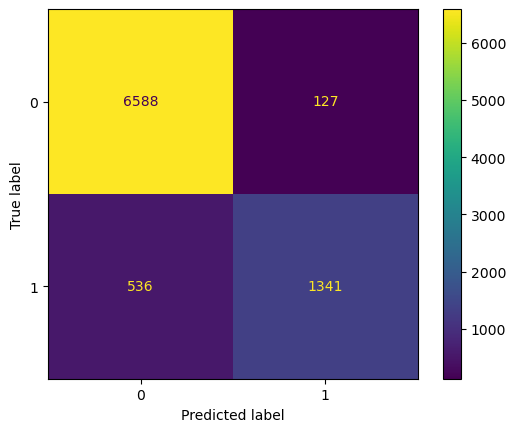

In [104]:
results(best_rf_grid,X_test, y_test)

Overall, the RandomForest performs well on the training data, achieving high accuracy and good precision and recall. However, there is a drop in performance when evaluated on the test data, indicating an issue of overfitting

In [105]:
rf2 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf2.fit(X_train, y_train)
print("Adjusted RandomForest Classifier: %.3f" % rf2.score(X_test, y_test))

Adjusted RandomForest Classifier: 0.922


# Support Vector Machine (SVM)

In [108]:
svc = Pipeline([('preprocessor', preprocessor), ('SMOTE',SMOTE()), ('classifier', SVC())])
svc.fit(X_train, y_train)
print("SVM score: %.3f" % svc.score(X_test, y_test))

SVM score: 0.851


In [109]:
svc_params = {'classifier__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'classifier__degree':[3,10,15]}

In [110]:
svc_grid = GridSearchCV(svc,svc_params, cv=5)
svc_grid.fit(X_train,y_train)

c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\thech\anaconda3\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a squ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__degree': [3, 10, 15],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']})

In [111]:
best_svc_grid = svc_grid.best_estimator_
best_svc_grid.fit(X_train, y_train)
print("SVC Grid score: %.3f" % best_svc_grid.score(X_test, y_test))

SVC Grid score: 0.853


Accuracy Score: 0.8705477401975457
Precision Score: 0.6741098370549186
Recall Score: 0.7746185852981969
F1 Score: 0.7208777024846724


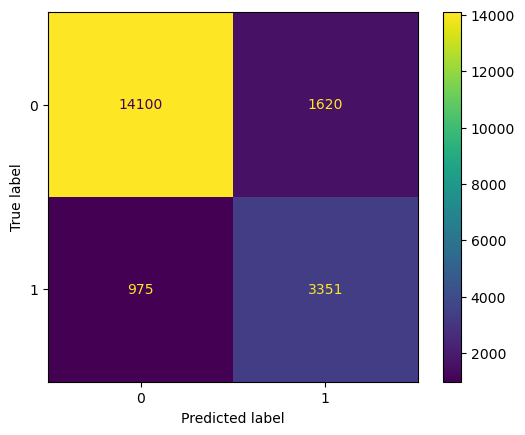

In [112]:
results(best_svc_grid,X_train, y_train) 

Accuracy Score: 0.8533519553072626
Precision Score: 0.6431554524361949
Recall Score: 0.7384123601491742
F1 Score: 0.6875


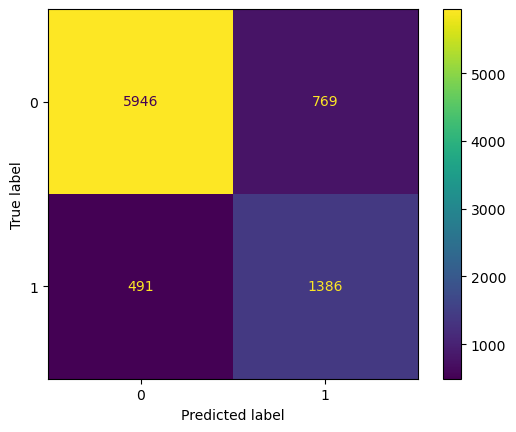

In [113]:
results(best_svc_grid,X_test, y_test)

# Testing Models on Random 

In [114]:
def test_random_row(models, df):
    random_index = random.randint(0, len(df) - 1)
    random_row = df.iloc[random_index]

    features = random_row.drop('loan_status')
    target = random_row['loan_status']

    results = {}
    for model_name, model in models.items():
        score = model.predict_proba([features])[0][target]
        results[model_name] = score

    return results

In [115]:
# 
# models = {
#     'Logistic Regression': logistic_regression_model,
#     'Random Forest': random_forest_model,
#     'SVM': svm_model,
#     # Add more models as needed
# }

# results = test_random_row(models, df)
